 # Restaurant Reviews Classification

 #### Dataset : https://www.kaggle.com/akram24/restaurant-reviews

# 1. Preprocessing

### Import Libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
# quoting=3: ignore these double quotes

In [3]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


### Data Exploration

In [4]:
df.shape

(1000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [7]:
df.isna().values.any()

False

### Countplot

In [8]:
df.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

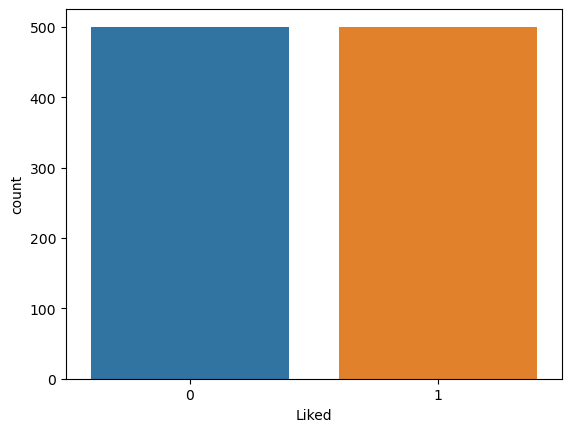

In [9]:
sns.countplot(data=df, x='Liked')
plt.show()

### Reviews' Lenght

In [10]:
df["Lenght"] = df.Review.apply(len)

In [11]:
df.head()

,Review,Liked,Lenght
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [12]:
df.Lenght.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Lenght, dtype: float64

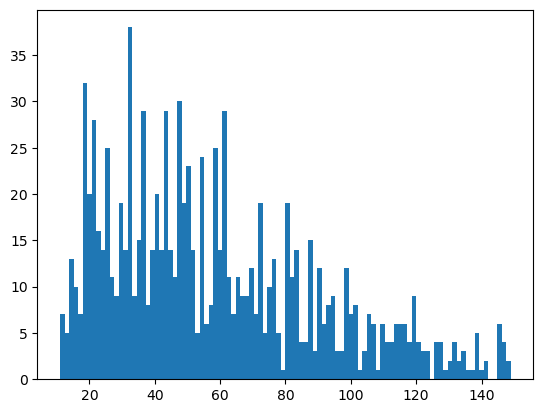

In [13]:
df.Lenght.hist(bins=100, grid=False)
plt.show()

In [14]:
# Longest review
df[df.Lenght == 149]["Review"].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [15]:
# Shortest review
df[df.Lenght == 11]["Review"].iloc[0]

'DELICIOUS!!'

In [16]:
# Positive reviews
positive = df[df.Liked == 1]

In [17]:
positive.Lenght.describe()

count    500.000000
mean      55.880000
std       30.219464
min       11.000000
25%       32.750000
50%       49.500000
75%       73.250000
max      148.000000
Name: Lenght, dtype: float64

In [18]:
# Negative reviews
negative = df[df.Liked == 0]

In [19]:
negative.Lenght.describe()

count    500.000000
mean      60.750000
std       34.224935
min       11.000000
25%       33.000000
50%       52.500000
75%       84.000000
max      149.000000
Name: Lenght, dtype: float64

# 2: Cleaning the texts and creating bag of words model

## Cleaning the texts

In [20]:
# import libraries
import re                                   
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords           
from nltk.stem.porter import PorterStemmer   

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pedrocerruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Text Cleaning

In [21]:
corpus = []

for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    
    ps = PorterStemmer()
    all_stopwards = stopwords.words('english')
    all_stopwards.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwards)]
    review = ' '.join(review)
    corpus.append(review)

In [22]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

### Creating Bag of Words Model

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv = CountVectorizer(max_features=1500)

In [25]:
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1]

In [26]:
x.shape

(1000, 1500)

In [27]:
y.shape

(1000,)

### Splitting the dataset

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
x_train.shape

(800, 1500)

In [31]:
y_train.shape

(800,)

In [32]:
x_test.shape

(200, 1500)

In [33]:
y_test.shape

(200,)

## 2. Model Building

### 2.1 Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [36]:
y_pred = classifier_nb.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
acc = accuracy_score(y_test, y_pred)

In [39]:
print(acc*100)

67.0


In [40]:
cm = confusion_matrix(y_test, y_pred)
cm### 2.1 Naive Bayes

array([[52, 55],
       [11, 82]])

### 2.2 XGBoost Classifier

In [41]:
from xgboost import XGBClassifier

In [42]:
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
acc = accuracy_score(y_test, y_pred)

In [44]:
print(acc*100)

67.0


In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[52, 55],
       [11, 82]])

## 3. Final Model (XGBoost Classifier)

In [46]:
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [47]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

67.0


In [48]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[52, 55],
       [11, 82]])